Hola **Daniel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

## OBJETIVO

Realizar un análisis detallado del ICE y RICE segun las hipotesis propuestas con su alcanze e impacto asi como el analisis de los datos de una prueba A/B para evaluar la efectividad de dos grupos (A y B) en una tienda en línea y tomar decisiones basadas en los resultado

## Librerias

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.info()
print(hypotheses.head(10))
print(hypotheses.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión inicial de tus datos y la transformación de los mismos, siempre es importante entender con lo que trabajarás!
</div>

## Comparación ICE vs. RICE

In [3]:
# Calcular ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Calcular RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por ICE y RICE
sorted_by_ice = hypotheses.sort_values(by='ICE', ascending=False)
sorted_by_rice = hypotheses.sort_values(by='RICE', ascending=False)

# Mostrar los resultados
print("Ordenadas por ICE:")
print(sorted_by_ice[['Hypothesis', 'ICE']])

print("\nOrdenadas por RICE:")
print(sorted_by_rice[['Hypothesis', 'RICE']])

Ordenadas por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

Ordenadas por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotio

### Concluciones  ICE vs. RICE

- El alcance (Reach) tiene un impacto crítico en la priorización bajo RICE. Hipótesis con mayor alcance pueden superar a otras con mayor impacto y confianza relativa si estas afectan a un público más pequeño.
- ICE es más útil para evaluar hipótesis en situaciones donde el alcance no es un factor clave. RICE, en cambio, es más completo porque considera tanto el alcance como el impacto, la confianza y el esfuerzo.

- La hipótesis H8 (promoción con descuentos) baja del primer lugar en ICE al quinto lugar en RICE.
Esto ocurre porque su alcance es relativamente bajo (Reach = 1), lo que disminuye su prioridad cuando se considera este factor.
- H7 (formulario de suscripción) se convierte en la principal prioridad en RICE debido a su altísimo alcance (Reach = 10), a pesar de ser solo la tercera en ICE.

- H2 (bloques de recomendación) también sube significativamente en RICE gracias a su mayor alcance

- El análisis demuestra cómo el uso de diferentes frameworks puede cambiar la priorización de las hipótesis. En este caso, RICE proporciona una perspectiva más amplia, destacando hipótesis con un alto alcance como prioridad. Para maximizar los ingresos, es recomendable priorizar las hipótesis H7 y H2 al implementar las ideas.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! Para un mejor entendimiento de las diferencias también podrías incluir una gráfica donde se muestre la diferencia entre ambos resultados
</div>

## Prueba A/B 

In [4]:
orders = pd.read_csv('/datasets/orders_us.csv')
visitors = pd.read_csv('/datasets/visits_us.csv')
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']
visitors.columns = ['date', 'group', 'visitors']
orders.info()
print(orders.head())
print(orders.describe())
visitors.info()
print(visitors.head())
print(visitors.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   orderId  1197 non-null   int64  
 1   userId   1197 non-null   int64  
 2   date     1197 non-null   object 
 3   revenue  1197 non-null   float64
 4   group    1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
      orderId      userId        date  revenue group
0  3667963787  3312258926  2019-08-15     30.4     B
1  2804400009  3642806036  2019-08-15     15.2     B
2  2961555356  4069496402  2019-08-15     10.2     A
3  3797467345  1196621759  2019-08-15    155.1     B
4  2282983706  2322279887  2019-08-15     40.5     B
            orderId        userId       revenue
count  1.197000e+03  1.197000e+03   1197.000000
mean   2.155621e+09  2.165960e+09    131.491646
std    1.229085e+09  1.236014e+09    603.004729
min    1.062393e+06  5.114589e+06      5.000000
25%    

In [5]:
#Convertir a fechas las columnas
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [6]:
# Identificar visitantes en ambos grupos
group_a = orders[orders['group'] == 'A']['userId']
group_b = orders[orders['group'] == 'B']['userId']

# Visitantes presentes en ambos grupos
duplicated_visitors = set(group_a).intersection(set(group_b))
print(f"Número de visitantes duplicados: {len(duplicated_visitors)}")
# Filtrar visitantes duplicados
orders = orders[~orders['userId'].isin(duplicated_visitors)]

Número de visitantes duplicados: 58


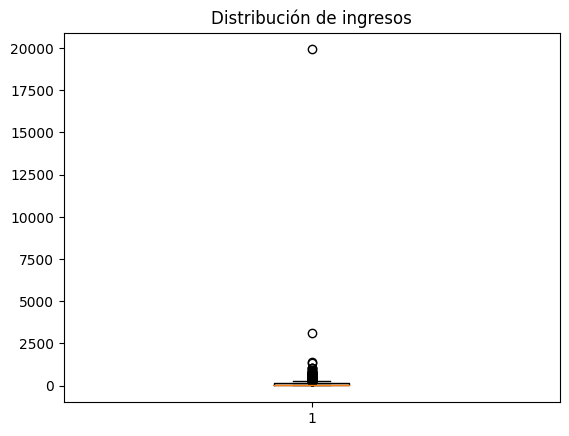

In [7]:
# Filtrar visitantes duplicados
orders = orders[~orders['userId'].isin(duplicated_visitors)]
plt.boxplot(orders['revenue'])
plt.title('Distribución de ingresos')
plt.show()

In [8]:
upper_limit = orders['revenue'].quantile(0.99)
orders = orders[orders['revenue'] <= upper_limit]

In [9]:
print(f"Rango de fechas en orders: {orders['date'].min()} a {orders['date'].max()}")
print(f"Rango de fechas en visits: {visitors['date'].min()} a {visitors['date'].max()}")

Rango de fechas en orders: 2019-08-01 00:00:00 a 2019-08-31 00:00:00
Rango de fechas en visits: 2019-08-01 00:00:00 a 2019-08-31 00:00:00


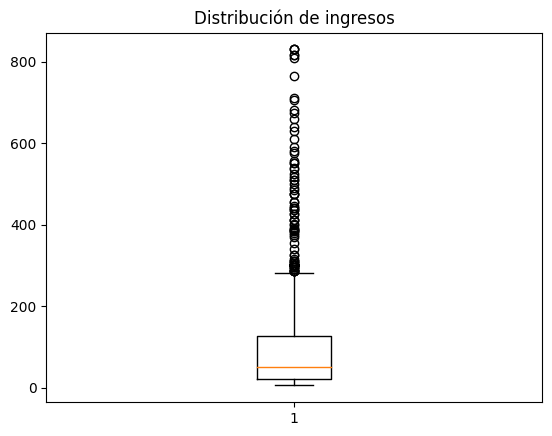

In [10]:
plt.boxplot(orders['revenue'])
plt.title('Distribución de ingresos')
plt.show()

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'orderId' : pd.Series.nunique, 'userId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
                                
                                        
print(orders.head(5))
print(visitors.head(5))
print(cumulativeData.head(5))

      orderId      userId       date  revenue group
0  3667963787  3312258926 2019-08-15     30.4     B
1  2804400009  3642806036 2019-08-15     15.2     B
3  3797467345  1196621759 2019-08-15    155.1     B
4  2282983706  2322279887 2019-08-15     40.5     B
5   182168103   935554773 2019-08-15     35.0     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756
        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

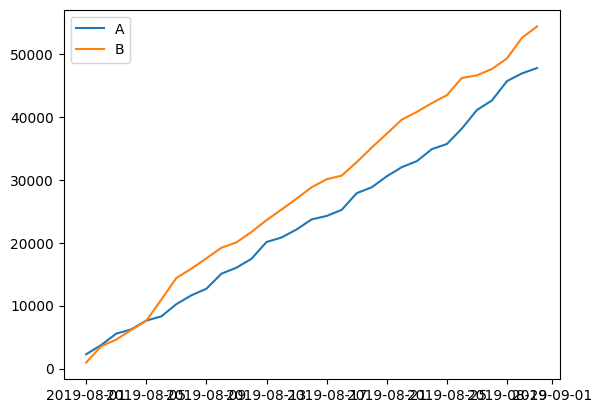

In [12]:
#DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

El grupo B toma la delantera en inicios de la prueba, seguramente incremento el nuemro de pedidos respecto a A

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

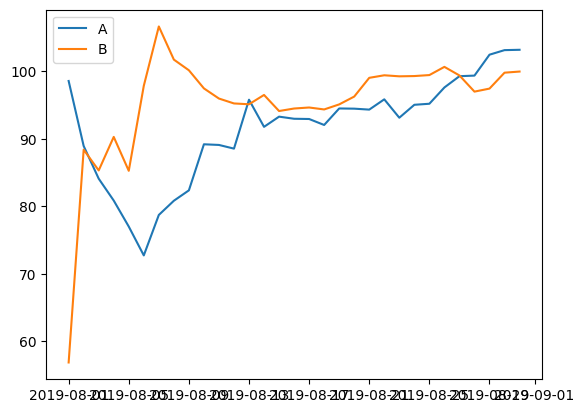

In [13]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

Se evidencia el tamano de compra del grupo B es mayor al del grupo A

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente
</div>

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

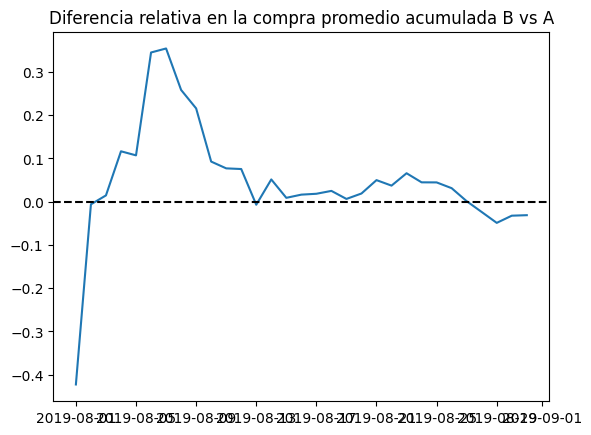

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Diferencia relativa en la compra promedio acumulada B vs A')

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

Aunque al principio el grupo B tiene una ventaja significativa en la compra promedio, esta ventaja desaparece con el tiempo y los ingresos promedio entre los grupos A y B se equiparan hacia el final del período.

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

(18109.0, 18139.0, 0.0, 0.05)

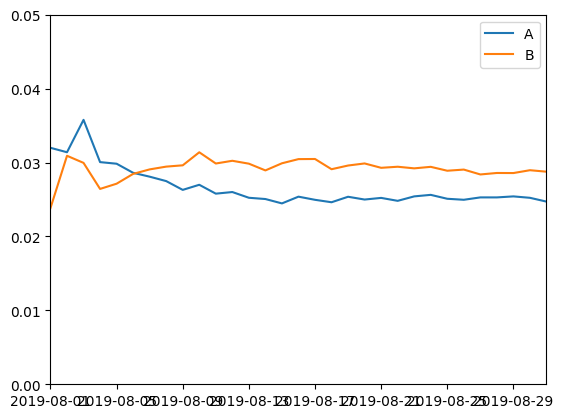

In [15]:
cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])

inicalmente A comenzo dominando sin embargo B tomo la delantenra a inicios de la prueba quedando constante los dos grupos 

       conversionA  conversionB
count    31.000000    31.000000
mean      0.026627     0.029131
std       0.002649     0.001388
min       0.024468     0.023843
25%       0.025078     0.028824
50%       0.025381     0.029284
75%       0.027237     0.029870
max       0.035772     0.031384


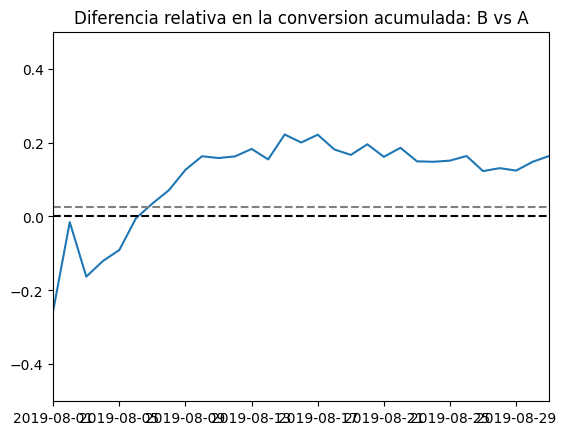

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)

plt.title('Diferencia relativa en la conversion acumulada: B vs A')

plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']
    / mergedCumulativeConversions['conversionA']
    - 1,
)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.026, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])


print(mergedCumulativeConversions.describe())

El grupo B tiene una conversión acumulada consistentemente mejor que el grupo A (línea mayoritariamente positiva). Esto sugiere que el grupo B logra que más usuarios realicen pedidos.

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

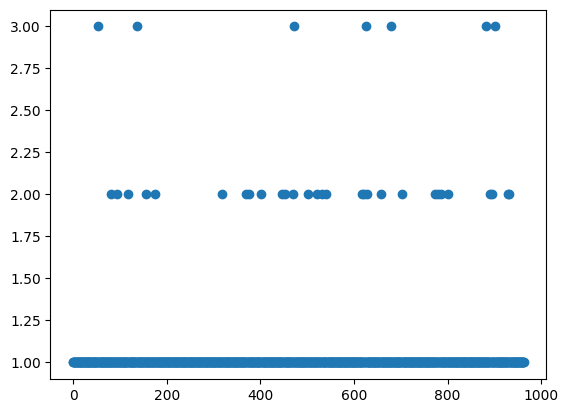

In [17]:
# Contar el número de pedidos por usuario
ordersByUsers = (orders.drop(['group','revenue', 'date'], axis= 1).groupby('userId', as_index=False).agg({'orderId': pd.Series.nunique}))
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])


Se estima que el aumento de mas de un pedido este asociado a la fluctuancia entre el grupo  A y B 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones y conclusiones desde las mismas, se pueden ver de manera correcta las diferencias entre grupos
</div>

### Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [18]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


No mas del 5% de los usuarios realizaron mas de 1 pedido al igual que el 10%

### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

         orderId      userId       date  revenue group
1003  2765619353    54447517 2019-08-08      5.0     A
602   2356264591  1224903511 2019-08-09      5.1     A
404   2052514069  1995481842 2019-08-28      5.1     B
908   3352225027  1807547430 2019-08-05      5.2     B
307   1404959653  3896738923 2019-08-18      5.2     A
...          ...         ...        ...      ...   ...
1142  3815014015  2606908679 2019-08-13    815.8     B
1006  1861540412  2261934787 2019-08-10    815.8     A
287    587872075  2254456485 2019-08-24    830.3     A
613   4071177889  3931967268 2019-08-07    830.3     B
131   3163614039  2254586615 2019-08-22    830.3     A

[1007 rows x 5 columns]


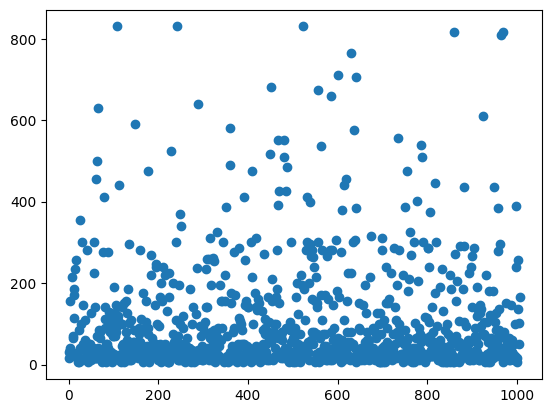

In [19]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
print(orders.sort_values(by='revenue'))

Se evidencia variedad en el monto de pedidos en gran vberidad entre los $0 a $300 sin embargo son pocos los ubicados entre $300 a $700

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [20]:
print(np.percentile(orders['revenue'], [90,95,99]))

[275.74  385.64  674.318]


<p> No mas del 5% de usuarion hicieron pedidos superiores al 400 y no mas del 1%  674 </p>

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores anómalos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [21]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

ordersByUsersA = orders[orders['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01679
0.138


P al ser inferior a 0.05 se rechaza la hipotesis nula, la gananca del grupo B respecto a A es del 13.8%

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [22]:
visitors = pd.read_csv('/datasets/visits_us.csv')
visitors.columns = ['date', 'group', 'visitors']
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


P al ser superior al 0.05 no existen diferencias estadisticamente significativas entre los tamanos del pedido sin mebargo hay una diferfencia relativa del 25,2%

<div class="alert alert-block alert-warning">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo aplicando las pruebas de hipótesis con los datos sin filtrar, veamos como resulta la misma prueba con los datos filtrados. Te recomiendo que aproveches más los strings formateados agregando texto que describa el valor que vas a mostrar, así es más fácil entender lo que quieres comunicar con esos números
</div>

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [23]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 400]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print('La cantidad de usuarios anomalos es de: ', abnormalUsers.shape[0])

568     113298937
1099    148427295
461     154576532
18      199603092
928     204675465
Name: userId, dtype: int64
La cantidad de usuarios anomalos es de:  120


In [24]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.02519
0.155


Anteriormente los resultados fueron 0.01679 y 0.138, en este caso para los datos filtrados pasamos a 0.025 y 0.155 donde el segmento B es mejor que el A

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [25]:
# Muestra el valor p calculado con la prueba U de Mann-Whitney
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',  # Selecciona datos en el grupo A
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'],  # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo A
    orders[np.logical_and(
        orders['group']=='B',  # Selecciona datos en el grupo B
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue']  # Excluye los usuarios anormales y selecciona los datos de ingreso para el grupo B
)[1]))  # Extrae el valor p de los resultados de la prueba

# Muestra la diferencia relativa en el ingreso medio entre los grupos B y A
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',  # Selecciona datos en el grupo B
           np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() /  # Calcula el ingreso medio para el grupo B
    orders[np.logical_and(orders['group']=='A',  # Selecciona datos en el grupo A
           np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))  # Calcula el ingreso medio para el grupo A y muestra la diferencia relativa 




0.701
-0.045


- En este caso, el valor p es 0.701, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula con un nivel de significancia común (como 0.05 o 5%).
- Un valor de -0.045 significa que los ingresos promedio del grupo B son un 4.5% más bajos que los del grupo A.
- No hay una diferencia estadísticamente significativa entre los ingresos de los grupos A y B después de excluir a los usuarios anormales y  aunque el grupo B tiene ingresos ligeramente inferiores en promedio, la diferencia no es estadísticamente significativa (según el valor p).

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada la prueba de hipótesis con los datos filtrados!
</div>

### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

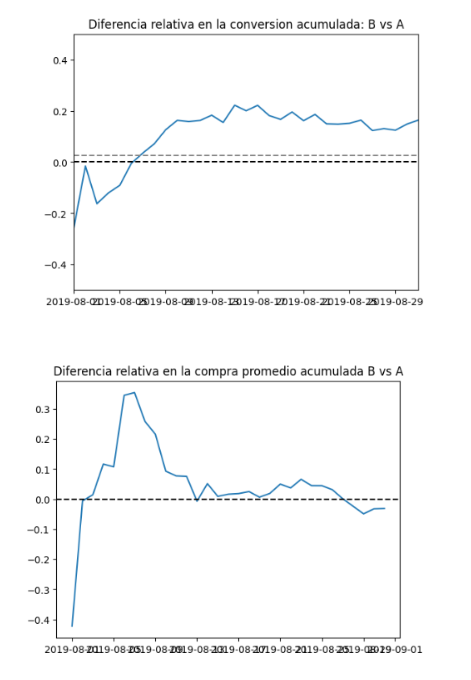

- No hay diferencia significativa en ingresos promedio por usuario entre los grupos A y B, según la prueba de Mann-Whitney
- El grupo B tiene una mejor conversión acumulada, lo cual es prometedor, pero no genera ingresos promedio significativamente mayores.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Saludos!
</div>